In [1]:
# author: René Kopeinig
# script: Seasonal Decomposition
# description: Calculate Seasonal Decomposition for cryptocurrency Time-Series

In [2]:
# Add IPython-specific directive to display plots directly below the notebook cell
%matplotlib inline

In [33]:
# Import dependencies
import os, quandl, pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [34]:
# Get data from Quandl
# What is Quandl? It is a marketplace for financial, economic and alternative data 
# delivered in modern formats for today's analysts, including Python.

def get_data(quandl_id):
    '''Download and cache Quandl dataseries'''
    cache_path = '{}.pkl'.format(quandl_id).replace('/','-')
    print cache_path
    try:
        f = open(cache_path, 'rb')
        df = pickle.load(f)   
        print('Loaded {} from cache'.format(quandl_id))
    except (OSError, IOError) as e:
        print('Downloading {} from Quandl'.format(quandl_id))
        df = quandl.get(quandl_id, returns="pandas")
        df.to_pickle(cache_path)
        print('Cached {} at {}'.format(quandl_id, cache_path))
    return df

In [35]:
# Autocorrelated Comparison between Litecoin, Ethereum and Bitcoin
gdax_ltc_eur = get_data('GDAX/LTC_EUR')
gdax_eth_eur = get_data('GDAX/ETH_EUR')
gdax_btc_eur = get_data('GDAX/EUR')

GDAX-LTC_EUR.pkl
Loaded GDAX/LTC_EUR from cache
GDAX-ETH_EUR.pkl
Loaded GDAX/ETH_EUR from cache
GDAX-EUR.pkl
Loaded GDAX/EUR from cache


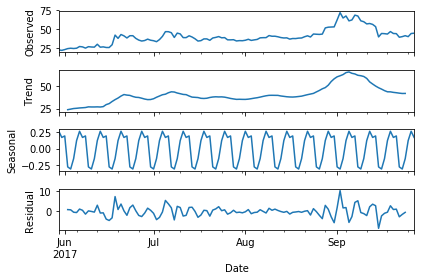

In [36]:
# Calculate Seasonal Decomposition for LiteCoin Time-Series
decomposition = sm.tsa.seasonal_decompose(gdax_ltc_eur['Open'], model='additive')
decomposition.plot()
plt.show()